# Features of Traffic Accidents in Uusimaa

In [1]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual, IntSlider, interactive
import json
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
pd.options.mode.chained_assignment = None
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sklearn
import math
from sympy import geometry
from pyproj import Proj, transform
import os

In [2]:
import folium
from folium import plugins
from folium.plugins import HeatMap
import webbrowser
import geopandas as gp
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
#Load the data
s=['Espoo','Helsinki','Hyvinkää','Järvenpää','Karkkila',
          'Kauniainen','Kerava','Kirkkonummi','Lohja','Mäntsälä',
          'Nurmijärvi','Pornainen','Sipoo','Siuntio','Tuusula',
          'Vantaa','Vihti','Lapinjärvi','Loviisa','Askola',
          'Myrskylä','Porvoo','Pukkila','Hanko','Inkoo','Raasepori']
c=['a single-class','a turning-class','a passing-class','a crossing-class','an encounter-class','a rear-end collision',
    'a moped-class','a bicycle-class','a pedestrian-class','a moose-class','a deer-class','an other animal-class','unclassified']
labels=['single','turn','pass','cross','enc','rear','mop',
        'bike','ped','moose','deer','anim','oth']
years=[2005 + i for i in range(13)]
r1={}
r2={}
r3={}
r4={}
i=0
h={}
months=[]
accidents=[]

#1.
year=2005+i
accident=pd.read_excel('Data/{}/UusimaaAccident.xlsx'.format(year))
data1=accident[['accidentId','dead','injr','munidesc']]
level=[3*data1['dead'][i] + data1['injr'][i] for i in range(len(data1))]
data1=pd.merge(data1,pd.Series(level,name='severlvl'),left_index=True,right_index=True)
for mun in s:
    v=dict(data1[data1['munidesc']==mun]['severlvl'].value_counts())
    h[mun]=sum([(i)*v[i] for i in v.keys()])/sum(v.values())
r1[year]=h
data2=accident[['hour','acclass','munidesc']]
data2['hour']=data2['hour'].replace([-1],data2['hour'].mode())
data2=data2[data2['munidesc'].isin(s)]
r2[year]=data2
r3[year]=accident[accident['munidesc'].isin(s)]['munidesc'].value_counts()
loc=accident[['X','Y','dead','injr']]
loc=loc.dropna(axis=0)
accident['dead_new'] = accident['dead'].map(lambda x: x*3)
accident['total'] = accident['dead_new'] +  accident['injr']
loc['severity'] = accident['total']
r4[year]=loc[['X','Y','severity']]

values=accident['month'].value_counts()
values=values.sort_index(ascending=True)
kuukaudet=list(values.index+12*i)
months=months+kuukaudet
arvot=list(values.values)
accidents=accidents+arvot

By Miika Frosti, Wenhsuan Hung and Zhao Zhao

In [4]:
#2.
i=i+1
year=2005+i
h={}
accident=pd.read_excel('Data/{}/UusimaaAccident.xlsx'.format(year))
data1=accident[['accidentId','dead','injr','munidesc']]
level=[3*data1['dead'][i] + data1['injr'][i] for i in range(len(data1))]
data1=pd.merge(data1,pd.Series(level,name='severity'),left_index=True,right_index=True)
for mun in s:
    v=dict(data1[data1['munidesc']==mun]['severity'].value_counts())
    h[mun]=sum([(i)*v[i] for i in v.keys()])/sum(v.values())
r1[year]=h
data2=accident[['hour','acclass','munidesc']]
data2.loc[data2['hour']==-1,'hour']=data2.loc[data2['hour']!=-1,'hour'].mode()
data2=data2[data2['munidesc'].isin(s)]
r2[year]=data2
r3[year]=accident[accident['munidesc'].isin(s)]['munidesc'].value_counts()
loc=accident[['X','Y','dead','injr']]
loc=loc.dropna(axis=0)
accident['dead_new'] = accident['dead'].map(lambda x: x*3)
accident['severity'] = accident['dead_new'] +  accident['injr']
loc['severity'] = accident['severity']
r4[year]=loc[['X','Y','severity']]

values=accident['month'].value_counts()
values=values.sort_index(ascending=True)
kuukaudet=list(values.index+12*i)
months=months+kuukaudet
arvot=list(values.values)
accidents=accidents+arvot

In [5]:
#3.
i=i+1
year=2005+i
h={}
accident=pd.read_excel('Data/{}/UusimaaAccident.xlsx'.format(year))
data1=accident[['accidentId','dead','injr','munidesc']]
level=[3*data1['dead'][i] + data1['injr'][i] for i in range(len(data1))]
data1=pd.merge(data1,pd.Series(level,name='severity'),left_index=True,right_index=True)
for mun in s:
    v=dict(data1[data1['munidesc']==mun]['severity'].value_counts())
    h[mun]=sum([(i)*v[i] for i in v.keys()])/sum(v.values())
r1[year]=h
data2=accident[['hour','acclass','munidesc']]
data2.loc[data2['hour']==-1,'hour']=data2.loc[data2['hour']!=-1,'hour'].mode()
data2=data2[data2['munidesc'].isin(s)]
r2[year]=data2 
r3[year]=accident[accident['munidesc'].isin(s)]['munidesc'].value_counts()
loc=accident[['X','Y','dead','injr']]
loc=loc.dropna(axis=0)
accident['dead_new'] = accident['dead'].map(lambda x: x*3)
accident['severity'] = accident['dead_new'] +  accident['injr']
loc['severity'] = accident['severity']
r4[year]=loc[['X','Y','severity']]

values=accident['month'].value_counts()
values=values.sort_index(ascending=True)
kuukaudet=list(values.index+12*i)
months=months+kuukaudet
arvot=list(values.values)
accidents=accidents+arvot

In [6]:
#4.
i=i+1
year=2005+i
h={}
accident=pd.read_excel('Data/{}/UusimaaAccident.xlsx'.format(year))
data1=accident[['accidentId','dead','injr','munidesc']]
level=[3*data1['dead'][i] + data1['injr'][i] for i in range(len(data1))]
data1=pd.merge(data1,pd.Series(level,name='severity'),left_index=True,right_index=True)
for mun in s:
    v=dict(data1[data1['munidesc']==mun]['severity'].value_counts())
    h[mun]=sum([(i)*v[i] for i in v.keys()])/sum(v.values())
r1[year]=h
data2=accident[['hour','acclass','munidesc']]
data2.loc[data2['hour']==-1,'hour']=data2.loc[data2['hour']!=-1,'hour'].mode()
data2=data2[data2['munidesc'].isin(s)]
r2[year]=data2
r3[year]=accident[accident['munidesc'].isin(s)]['munidesc'].value_counts()
loc=accident[['X','Y','dead','injr']]
loc=loc.dropna(axis=0)
accident['dead_new'] = accident['dead'].map(lambda x: x*3)
accident['severity'] = accident['dead_new'] +  accident['injr']
loc['severity'] = accident['severity']
r4[year]=loc[['X','Y','severity']]

values=accident['month'].value_counts()
values=values.sort_index(ascending=True)
kuukaudet=list(values.index+12*i)
months=months+kuukaudet
arvot=list(values.values)
accidents=accidents+arvot

In [7]:
#5.
i=i+1
year=2005+i
h={}
accident=pd.read_excel('Data/{}/UusimaaAccident.xlsx'.format(year))
data1=accident[['accidentId','dead','injr','munidesc']]
level=[3*data1['dead'][i] + data1['injr'][i] for i in range(len(data1))]
data1=pd.merge(data1,pd.Series(level,name='severity'),left_index=True,right_index=True)
for mun in s:
    v=dict(data1[data1['munidesc']==mun]['severity'].value_counts())
    h[mun]=sum([(i)*v[i] for i in v.keys()])/sum(v.values())
r1[year]=h
data2=accident[['hour','acclass','munidesc']]
data2.loc[data2['hour']==-1,'hour']=data2.loc[data2['hour']!=-1,'hour'].mode()
data2=data2[data2['munidesc'].isin(s)]
r2[year]=data2
r3[year]=accident[accident['munidesc'].isin(s)]['munidesc'].value_counts()
loc=accident[['X','Y','dead','injr']]
loc=loc.dropna(axis=0)
accident['dead_new'] = accident['dead'].map(lambda x: x*3)
accident['severity'] = accident['dead_new'] +  accident['injr']
loc['severity'] = accident['severity']
r4[year]=loc[['X','Y','severity']]

values=accident['month'].value_counts()
values=values.sort_index(ascending=True)
kuukaudet=list(values.index+12*i)
months=months+kuukaudet
arvot=list(values.values)
accidents=accidents+arvot

In [8]:
#6.
i=i+1
year=2005+i
h={}
accident=pd.read_excel('Data/{}/UusimaaAccident.xlsx'.format(year))
data1=accident[['accidentId','dead','injr','munidesc']]
level=[3*data1['dead'][i] + data1['injr'][i] for i in range(len(data1))]
data1=pd.merge(data1,pd.Series(level,name='severity'),left_index=True,right_index=True)
for mun in s:
    v=dict(data1[data1['munidesc']==mun]['severity'].value_counts())
    h[mun]=sum([(i)*v[i] for i in v.keys()])/sum(v.values())
r1[year]=h
data2=accident[['hour','acclass','munidesc']]
data2.loc[data2['hour']==-1,'hour']=data2.loc[data2['hour']!=-1,'hour'].mode()
data2=data2[data2['munidesc'].isin(s)]
r2[year]=data2
r3[year]=accident[accident['munidesc'].isin(s)]['munidesc'].value_counts()
loc=accident[['X','Y','dead','injr']]
loc=loc.dropna(axis=0)
accident['dead_new'] = accident['dead'].map(lambda x: x*3)
accident['severity'] = accident['dead_new'] +  accident['injr']
loc['severity'] = accident['severity']
r4[year]=loc[['X','Y','severity']]

values=accident['month'].value_counts()
values=values.sort_index(ascending=True)
kuukaudet=list(values.index+12*i)
months=months+kuukaudet
arvot=list(values.values)
accidents=accidents+arvot

In [9]:
#7.
i=i+1
year=2005+i
h={}
accident=pd.read_excel('Data/{}/UusimaaAccident.xlsx'.format(year))
data1=accident[['accidentId','dead','injr','munidesc']]
level=[3*data1['dead'][i] + data1['injr'][i] for i in range(len(data1))]
data1=pd.merge(data1,pd.Series(level,name='severity'),left_index=True,right_index=True)
for mun in s:
    v=dict(data1[data1['munidesc']==mun]['severity'].value_counts())
    h[mun]=sum([(i)*v[i] for i in v.keys()])/sum(v.values())
r1[year]=h
data2=accident[['hour','acclass','munidesc']]
data2.loc[data2['hour']==-1,'hour']=data2.loc[data2['hour']!=-1,'hour'].mode()
data2=data2[data2['munidesc'].isin(s)]
r2[year]=data2
r3[year]=accident[accident['munidesc'].isin(s)]['munidesc'].value_counts()
loc=accident[['X','Y','dead','injr']]
loc=loc.dropna(axis=0)
accident['dead_new'] = accident['dead'].map(lambda x: x*3)
accident['severity'] = accident['dead_new'] +  accident['injr']
loc['severity'] = accident['severity']
r4[year]=loc[['X','Y','severity']]

values=accident['month'].value_counts()
values=values.sort_index(ascending=True)
kuukaudet=list(values.index+12*i)
months=months+kuukaudet
arvot=list(values.values)
accidents=accidents+arvot

This application uses the data from https://www.avoindata.fi/data/en_GB/dataset/tieliikenneonnettomuudet

In [10]:
#8.
i=i+1
year=2005+i
h={}
accident=pd.read_excel('Data/{}/UusimaaAccident.xlsx'.format(year))
data1=accident[['accidentId','dead','injr','munidesc']]
level=[3*data1['dead'][i] + data1['injr'][i] for i in range(len(data1))]
data1=pd.merge(data1,pd.Series(level,name='severity'),left_index=True,right_index=True)
for mun in s:
    v=dict(data1[data1['munidesc']==mun]['severity'].value_counts())
    h[mun]=sum([(i)*v[i] for i in v.keys()])/sum(v.values())
r1[year]=h
data2=accident[['hour','acclass','munidesc']]
data2.loc[data2['hour']==-1,'hour']=data2.loc[data2['hour']!=-1,'hour'].mode()
data2=data2[data2['munidesc'].isin(s)]
r2[year]=data2
r3[year]=accident[accident['munidesc'].isin(s)]['munidesc'].value_counts()
loc=accident[['X','Y','dead','injr']]
loc=loc.dropna(axis=0)
accident['dead_new'] = accident['dead'].map(lambda x: x*3)
accident['severity'] = accident['dead_new'] +  accident['injr']
loc['severity'] = accident['severity']
r4[year]=loc[['X','Y','severity']]

values=accident['month'].value_counts()
values=values.sort_index(ascending=True)
kuukaudet=list(values.index+12*i)
months=months+kuukaudet
arvot=list(values.values)
accidents=accidents+arvot

In [11]:
#9.
i=i+1
year=2005+i
h={}
accident=pd.read_excel('Data/{}/UusimaaAccident.xlsx'.format(year))
data1=accident[['accidentId','dead','injr','munidesc']]
level=[3*data1['dead'][i] + data1['injr'][i] for i in range(len(data1))]
data1=pd.merge(data1,pd.Series(level,name='severity'),left_index=True,right_index=True)
for mun in s:
    v=dict(data1[data1['munidesc']==mun]['severity'].value_counts())
    h[mun]=sum([(i)*v[i] for i in v.keys()])/sum(v.values())
r1[year]=h
data2=accident[['hour','acclass','munidesc']]
data2.loc[data2['hour']==-1,'hour']=data2.loc[data2['hour']!=-1,'hour'].mode()
data2=data2[data2['munidesc'].isin(s)]
r2[year]=data2
r3[year]=accident[accident['munidesc'].isin(s)]['munidesc'].value_counts()
loc=accident[['X','Y','dead','injr']]
loc=loc.dropna(axis=0)
accident['dead_new'] = accident['dead'].map(lambda x: x*3)
accident['severity'] = accident['dead_new'] +  accident['injr']
loc['severity'] = accident['severity']
r4[year]=loc[['X','Y','severity']]

values=accident['month'].value_counts()
values=values.sort_index(ascending=True)
kuukaudet=list(values.index+12*i)
months=months+kuukaudet
arvot=list(values.values)
accidents=accidents+arvot

In [12]:
#10.
i=i+1
year=2005+i
h={}
accident=pd.read_excel('Data/{}/UusimaaAccident.xlsx'.format(year))
data1=accident[['accidentId','dead','injr','munidesc']]
level=[3*data1['dead'][i] + data1['injr'][i] for i in range(len(data1))]
data1=pd.merge(data1,pd.Series(level,name='severity'),left_index=True,right_index=True)
for mun in s:
    v=dict(data1[data1['munidesc']==mun]['severity'].value_counts())
    h[mun]=sum([(i)*v[i] for i in v.keys()])/sum(v.values())
r1[year]=h
data2=accident[['hour','acclass','munidesc']]
data2.loc[data2['hour']==-1,'hour']=data2.loc[data2['hour']!=-1,'hour'].mode()
data2=data2[data2['munidesc'].isin(s)]
r2[year]=data2
r3[year]=accident[accident['munidesc'].isin(s)]['munidesc'].value_counts()
loc=accident[['X','Y','dead','injr']]
loc=loc.dropna(axis=0)
accident['dead_new'] = accident['dead'].map(lambda x: x*3)
accident['severity'] = accident['dead_new'] +  accident['injr']
loc['severity'] = accident['severity']
r4[year]=loc[['X','Y','severity']]

values=accident['month'].value_counts()
values=values.sort_index(ascending=True)
kuukaudet=list(values.index+12*i)
months=months+kuukaudet
arvot=list(values.values)
accidents=accidents+arvot

In [13]:
#11.
i=i+1
year=2005+i
h={}
accident=pd.read_excel('Data/{}/UusimaaAccident.xlsx'.format(year))
data1=accident[['accidentId','dead','injr','munidesc']]
level=[3*data1['dead'][i] + data1['injr'][i] for i in range(len(data1))]
data1=pd.merge(data1,pd.Series(level,name='severity'),left_index=True,right_index=True)
for mun in s:
    v=dict(data1[data1['munidesc']==mun]['severity'].value_counts())
    h[mun]=sum([(i)*v[i] for i in v.keys()])/sum(v.values())
r1[year]=h
data2=accident[['hour','acclass','munidesc']]
data2.loc[data2['hour']==-1,'hour']=data2.loc[data2['hour']!=-1,'hour'].mode()
data2=data2[data2['munidesc'].isin(s)]
r2[year]=data2
r3[year]=accident[accident['munidesc'].isin(s)]['munidesc'].value_counts()
loc=accident[['X','Y','dead','injr']]
loc=loc.dropna(axis=0)
accident['dead_new'] = accident['dead'].map(lambda x: x*3)
accident['severity'] = accident['dead_new'] +  accident['injr']
loc['severity'] = accident['severity']
r4[year]=loc[['X','Y','severity']]

values=accident['month'].value_counts()
values=values.sort_index(ascending=True)
kuukaudet=list(values.index+12*i)
months=months+kuukaudet
arvot=list(values.values)
accidents=accidents+arvot

In [14]:
#12.
i=i+1
year=2005+i
h={}
accident=pd.read_excel('Data/{}/UusimaaAccident.xlsx'.format(year))
data1=accident[['accidentId','dead','injr','munidesc']]
level=[3*data1['dead'][i] + data1['injr'][i] for i in range(len(data1))]
data1=pd.merge(data1,pd.Series(level,name='severity'),left_index=True,right_index=True)
for mun in s:
    v=dict(data1[data1['munidesc']==mun]['severity'].value_counts())
    h[mun]=sum([(i)*v[i] for i in v.keys()])/sum(v.values())
r1[year]=h
data2=accident[['hour','acclass','munidesc']]
data2.loc[data2['hour']==-1,'hour']=data2.loc[data2['hour']!=-1,'hour'].mode()
data2=data2[data2['munidesc'].isin(s)]
r2[year]=data2
r3[year]=accident[accident['munidesc'].isin(s)]['munidesc'].value_counts()
loc=accident[['X','Y','dead','injr']]
loc=loc.dropna(axis=0)
accident['dead_new'] = accident['dead'].map(lambda x: x*3)
accident['severity'] = accident['dead_new'] +  accident['injr']
loc['severity'] = accident['severity']
r4[year]=loc[['X','Y','severity']]

values=accident['month'].value_counts()
values=values.sort_index(ascending=True)
kuukaudet=list(values.index+12*i)
months=months+kuukaudet
arvot=list(values.values)
accidents=accidents+arvot

### Traffic accidents in general

In [15]:
#13.
i=i+1
year=2005+i
h={}
accident=pd.read_excel('Data/{}/UusimaaAccident.xlsx'.format(year))
data1=accident[['accidentId','dead','injr','munidesc']]
level=[3*data1['dead'][i] + data1['injr'][i] for i in range(len(data1))]
data1=pd.merge(data1,pd.Series(level,name='severity'),left_index=True,right_index=True)
for mun in s:
    v=dict(data1[data1['munidesc']==mun]['severity'].value_counts())
    h[mun]=sum([(i)*v[i] for i in v.keys()])/sum(v.values())
r1[year]=h
data2=accident[['hour','acclass','munidesc']]
data2.loc[data2['hour']==-1,'hour']=data2.loc[data2['hour']!=-1,'hour'].mode()
data2=data2[data2['munidesc'].isin(s)]
r2[year]=data2
r3[year]=accident[accident['munidesc'].isin(s)]['munidesc'].value_counts()
loc=accident[['X','Y','dead','injr']]
loc=loc.dropna(axis=0)
accident['dead_new'] = accident['dead'].map(lambda x: x*3)
accident['severity'] = accident['dead_new'] +  accident['injr']
loc['severity'] = accident['severity']
r4[year]=loc[['X','Y','severity']]

values=accident['month'].value_counts()
values=values.sort_index(ascending=True)
kuukaudet=list(values.index+12*i)
months=months+kuukaudet
arvot=list(values.values)
accidents=accidents+arvot

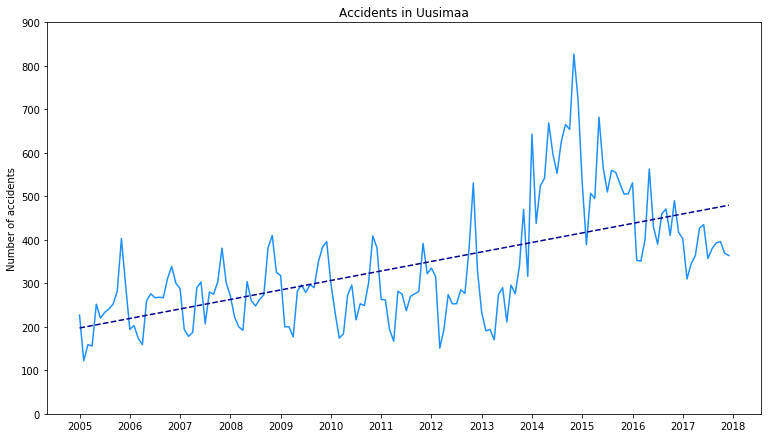

In [16]:
matplotlib.rcParams['figure.figsize'] = [12.8, 7.2]
plt.ylim((0,900))
plt.title('Accidents in Uusimaa')
#plt.plot(months,accidents)
plt.xticks([1+12*i for i in range(14)],[2005+i for i in range(14)])
plt.ylabel('Number of accidents')
#plt.legend([plt.plot([],marker='o',ls='',color=color)[0] for color in colors],
#['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
#loc='lower center',ncol=12)

model=LinearRegression()
model.fit(np.vstack(np.array(months).T),accidents)
plt.plot(months,accidents,c='dodgerblue')
yfit=model.predict(np.vstack(np.array(months).T))
plt.plot(months,yfit,'--',c='darkblue')
plt.show()

In [17]:
bluedata=r1
hourdata=r2
mundata=r3
locdata=r4

In [18]:
def barplot1(year):
    matplotlib.rcParams['figure.figsize'] = [6.4, 4.8]
    values=mundata[year]
    kunnat=list(values.index)
    arvot=list(values.values)
    arvot=[values[values.index==s1].values[0] for s1 in s]
    plt.figure(figsize=(9,6))
    plt.barh(np.arange(len(s)),arvot,alpha=1)
    plt.yticks(np.arange(len(s)),s)
    plt.xlabel('Number of accidents')
    plt.xlim((0,3500))
    plt.title('Accidents in Uusimaa during year {}.'.format(year))
    plt.show()
    

In [19]:
def map(year):
    loc=locdata[year]
    lats = loc['Y']
    lons = loc['X']
    lats = lats.tolist()
    lons = lons.tolist()
    p1 = Proj(init='epsg:3067')
    p2 = Proj(init='epsg:4326')
    x1, y1 = lons,lats
    x2, y2 = transform(p1, p2, x1, y1)
    location={"lats" : y2,
       "lons" : x2}
    crd=pd.DataFrame(location)
    crd=crd[(crd['lats']<61) & (crd['lats']>59) & 
           (crd['lons']<26.7) & (crd['lons']>22.5)]
    crd=crd.dropna(axis=0)
    map_osm = folium.Map(location=[crd['lats'].mean(), crd['lons'].mean()], zoom_start=10)
    tupxy = [tuple(x) for x in crd[["lats","lons"]].values]
    for coord in tupxy:
        folium.Marker(location=[coord[0], coord[1]],
                      radius=10,
                      color='#3186cc',
                      fill_color='#3186cc',
                     ).add_to(map_osm)
    display(map_osm)

This map will show you specific location of each traffic accident:

In [20]:
with open('Data/Uusimaa.txt') as u:
    u=open('Data/Uusimaa.txt')
    Uusimaa=json.loads(u.read())
df=json_normalize(Uusimaa['features'])
c=pd.Series(df['geometry.coordinates'].fillna(df['geometry.geometries']),name='Shapes')
df=df.join(c)
df['properties.name'][5]='Hyvinkää'
df['properties.name'][7]='Järvenpää'
df['properties.name'][12]='Lapinjärvi'
df['properties.name'][14]='Myrskylä'
df['properties.name'][15]='Mäntsälä'
df['properties.name'][16]='Nurmijärvi'

In [21]:
accident=pd.read_excel('Data/2017/UusimaaAccident.xlsx')
accident=accident[['hour','acclass','munidesc']]
accident['hour']=accident['hour'].replace([-1],accident['hour'].mode())
c=['a single-class','a turning-class','a passing-class','a crossing-class','an encounter-class','a rear-end collision',
    'a moped-class','a bicycle-class','a pedestrian-class','a moose-class','a deer-class','an other animal-class','unclassified']
labels=['single','turn','pass','cross','enc','rear','mop',
        'bike','ped','moose','deer','anim','oth']
data2=accident[['hour','acclass','munidesc']]
data2=data2[data2['munidesc'].isin(s)]
classes=dict([(c[i],i+1) for i in np.arange(13)])

In [22]:
im2=interact_manual(map,year=IntSlider(min=2009, max=2017, step=1),description="SELECT THE YEAR")
im2.widget.children[1].description=("Select a year")

interactive(children=(IntSlider(value=2009, description='year', max=2017, min=2009), Button(description='Run I…

This chart will show you the number of traffic accidents sorted by the municipality where the accidents took place.

In [23]:
slider=IntSlider(min=2005, max=2017, step=1)
im4=widgets.interactive_output(barplot1,{'year':slider})
im4.layout.height='400px'
display(slider,im4)

IntSlider(value=2005, max=2017, min=2005)

Output(layout=Layout(height='400px'))

In [24]:
def barplot2(acclass,year):
    matplotlib.rcParams['figure.figsize'] = [8.0, 3.6]
    funcdata=hourdata[year]
    colname='hour'
    s=['Espoo','Helsinki','Hyvinkää','Järvenpää','Karkkila',
    'Kauniainen','Kerava','Kirkkonummi','Lohja','Mäntsälä',
    'Nurmijärvi','Pornainen','Sipoo','Siuntio','Tuusula',
    'Vantaa','Vihti','Lapinjärvi','Loviisa','Askola',
    'Myrskylä','Porvoo','Pukkila','Hanko','Inkoo','Raasepori']
    values=funcdata[funcdata['acclass']==classes[acclass]][colname].value_counts()
    hours=list(values.index)
    counted=list(values.values)
    x=np.arange(24)
    for i in np.arange(24):
        if i+1 in hours:
            x[i]=values[i+1]
        else:
            x[i]=0
    plt.bar(np.arange(24)+1,x,alpha=1)
    plt.xticks(np.arange(24)+1)
    plt.ylabel('Number of accidents')
    plt.ylim((0,200))
    plt.xlabel('Hour of the day')
    classname=acclass
    plt.title('Accidents classified as \'{}\' during the year {}.'.format(classname,year))

The next chart will show you what kind of traffic accidents are most frequent during certain hours of the day.

In [25]:
drop=widgets.Dropdown(options=c,description='Class:')
slider=IntSlider(min=2005, max=2017, step=1)
box=widgets.HBox([drop,slider])
im5=widgets.interactive_output(barplot2,{'acclass':drop,'year':slider})
im5.layout.height='300px'
display(box,im5)

Output(layout=Layout(height='300px'))

### Where are the traffic accidents most severe?

The severity of an accident is defined by the formula "level = 3 X dead + 1 X injured". The severity of a municipality is defined by the average severity of all accidents in the municipality.

In [42]:
def plot(year):
    matplotlib.rcParams['figure.figsize'] = [12.8, 7.2]
    mun=[]
    clist=['cyan','deepskyblue','dodgerblue','royalblue','blue','darkblue']
    heat=bluedata[year]
    c='white'
    for i in range(len(df)):
        t=df['Shapes'][i]
        mun.append(df['properties.name'][i])
        if heat[df['properties.name'][i]]==0:
            c=clist[0]
        if (heat[df['properties.name'][i]]>0) & (heat[df['properties.name'][i]]<=0.25) :
            c=clist[1]
        if (heat[df['properties.name'][i]]>0.25) & (heat[df['properties.name'][i]]<=0.50) :
            c=clist[2]
        if (heat[df['properties.name'][i]]>0.50) & (heat[df['properties.name'][i]]<=0.75) :
            c=clist[3]
        if (heat[df['properties.name'][i]]>0.75) & (heat[df['properties.name'][i]]<=1.00) :
            c=clist[4]
        if heat[df['properties.name'][i]]>1.0:
            c=clist[5]
            
        if len(t)==1:
            x=[t[0][l][0] for l in range(len(t[0]))]
            y=[t[0][l][1] for l in range(len(t[0]))]
            plt.fill(x,y,c)
            plt.plot(x,y,c='k',linewidth=0.5)
                
                
        else:
            for s in t:
                x=[s['coordinates'][0][l][0] for l in range(len(s['coordinates'][0]))]
                y=[s['coordinates'][0][l][1] for l in range(len(s['coordinates'][0]))]
                plt.fill(x,y,c)
                plt.plot(x,y,c='k',linewidth=0.5)
                p1=mpatches.Patch(color=clist[0], label='==0.0')
                p2=mpatches.Patch(color=clist[1], label='0.01-0.25')
                p3=mpatches.Patch(color=clist[2], label='0.26-0.50')
                p4=mpatches.Patch(color=clist[3], label='0.51-0.75')
                p5=mpatches.Patch(color=clist[4], label='0.76-1.00')
                p6=mpatches.Patch(color=clist[5], label='>1.0')
    patches=[p1,p2,p3,p4,p5,p6]
    plt.legend(bbox_to_anchor=(1.05,1.00),handles=patches)
    plt.title('Average severity of traffic accidents in the municipalities of Uusimaa during the year {}'.format(year))

Below we have the map of Uusimaa, where each municipality is marked by its level of severity.

In [43]:
im1=interact_manual(plot,year=IntSlider(min=2005, max=2017, step=1),description="SELECT THE YEAR")
im1.widget.children[1].description=("Select a year")

interactive(children=(IntSlider(value=2005, description='year', max=2017, min=2005), Button(description='Run I…

In [28]:
def heatmap(year):
    loc=locdata[year]
    lats = loc['Y']
    lons = loc['X']
    lvl = loc['severity']
    lats = lats.tolist()
    lons = lons.tolist()
    p1 = Proj(init='epsg:3067')
    p2 = Proj(init='epsg:4326')
    x1, y1 = lons,lats
    x2, y2 = transform(p1, p2, x1, y1)
    location={"lats" : y2,
       "lons" : x2, "severlvl" : lvl}
    crd=pd.DataFrame(location)
    crd=crd[(crd['lats']<61) & (crd['lats']>59) & 
           (crd['lons']<26.7) & (crd['lons']>22.5)]
    crd=crd.dropna(axis=0)
    map_osm = folium.Map(location=[crd['lats'].mean(), crd['lons'].mean()], zoom_start=10)
    tupxy = [tuple(x) for x in crd[["lats","lons"]].values]
    for coord in tupxy:
        folium.Marker(location=[coord[0], coord[1]],
                      radius=10,
                      color='#3186cc',
                      fill_color='#3186cc',
                     ).add_to(map_osm)
    data = crd[['lats', 'lons', 'severlvl']].values.tolist()
    hmap = folium.Map(location=[crd['lats'].mean(), crd['lons'].mean()], tiles='stamentoner',
                      control_scale=True, zoom_start=13)
    hmap.add_child(HeatMap(data, radius=10, gradient={0.3: 'blue', 0.55: 'orange'}))
    display(hmap)

The following will print a heatmap of the severity of the accidents in Uusimaa.

In [29]:
im3=interact_manual(heatmap,year=IntSlider(min=2009, max=2017, step=1),description="SELECT THE YEAR")
im3.widget.children[1].description=("Select a year")

interactive(children=(IntSlider(value=2009, description='year', max=2017, min=2009), Button(description='Run I…

In [30]:
data = pd.read_excel('Data/2017/UusimaaAccident.xlsx')
data['wkday'] = data['wkday'].replace(['Maanantai','Tiistai','Keskiviikko','Torstai','Perjantai','Lauantai','Sunnuntai'],[1,2,3,4,5,6,7])
data['Urban']=data['Urban'].replace(['E','K',' '],[0,1,-1])
data = data.replace([-1,'Ei arvoa'],np.nan)
D = []
for d in data['day']:
    d=str(d)
    d1 = d[8:10]
    D.append(d1)
data['daytime'] = D

In [31]:
data['dead_new'] = data['dead'].map(lambda x: x*3)
data['severity'] = data['dead_new'] +  data['injr']
for col in ['surface','accloc','brightness','hour']:
    mode1 = data[col].value_counts().keys()[0]
    data[col] = data[col].fillna(mode1)

In [32]:
for col in ['weather','temperature']:
    editframe = data[['accidentId',col,'hour','month','daytime']]
    known = editframe[editframe[col].notnull()]
    unknow = editframe[editframe[col].isnull()]
    X_train = known[['daytime','hour','month']]
    y_train = known[col]
    X_test = unknow[['daytime','hour','month']]
    y_test = unknow[col]
    classifier = RandomForestClassifier(n_estimators=50, random_state=0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    unknow[col] = y_pred
    data[col]=data[col].fillna(unknow[col])

### Important factors

In [33]:
cols=['hour','temperature','spdlim','X','Y',
            'wkday','municipality','month','weather','severity',
            'roadmain','surface','pavement','intersection','urbmrk']
data1=data[cols].dropna(axis=0)
cols.remove('severity')
features=data1[cols]
target=data1['severity']

In [34]:
feat_train, feat_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state = 3)
classifier = RandomForestClassifier(n_estimators=50, random_state=0)
classifier = classifier.fit(feat_train,target_train)
target_pred = classifier.predict(feat_test)
importance=classifier.feature_importances_

In [35]:
#classifier.score(feat_test,target_test)
#print('Mean Absolute Error:', metrics.mean_absolute_error(target_test, target_pred))
#print('Mean Squared Error:', metrics.mean_squared_error(target_test, target_pred))
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(target_test, target_pred)))

In [36]:
#print(confusion_matrix(target_test,target_pred))
#print(classification_report(target_test,target_pred))
#print(accuracy_score(target_test, target_pred))

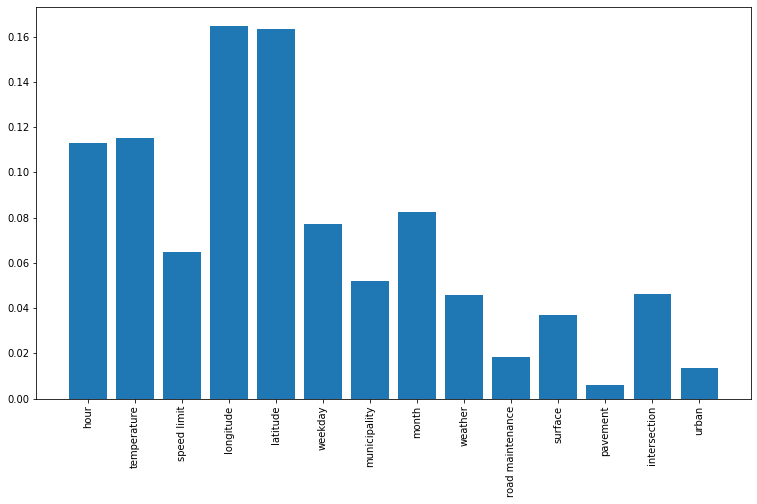

In [37]:
matplotlib.rcParams['figure.figsize'] = [12.8, 7.2]
feature_labels=['hour','temperature','speed limit','longitude','latitude',
            'weekday','municipality','month','weather',
            'road maintenance','surface','pavement','intersection','urban']
plt.bar(list(features.columns),importance)
plt.xticks(list(features.columns),feature_labels,rotation=90)
plt.savefig('features.png', bbox_inches="tight")
plt.show()

Using the data from year 2017 we find that, as shown in the above chart, the variables that explain the severity of accidents the best involve time, location and temperature.

In [38]:
#acctype = pd.get_dummies(data['acctype'],prefix='acctype')
#surface = pd.get_dummies(data['surface'],prefix='surface')
#weather = pd.get_dummies(data['weather'],prefix='weather')
#accloc = pd.get_dummies(data['accloc'],prefix='accloc')
#acclass = pd.get_dummies(data['acclass'],prefix='acclass')
#brightness = pd.get_dummies(data['brightness'],prefix='acclass')
#municipality = pd.get_dummies(data['municipality'],prefix='acclass')
#month = pd.get_dummies(data['month'],prefix='acclass')
#brightness = pd.get_dummies(data['brightness'],prefix='brightness')
#municipality = pd.get_dummies(data['municipality'],prefix='municipality')
#month = pd.get_dummies(data['month'],prefix='month')
#hour = data['hour']
#temperature = data['temperature']


In [39]:
#X = pd.concat([acctype,surface,weather,accloc,
#               acclass,brightness,municipality,
#               month,hour,temperature],axis=1)
#Y=data['severity']

In [40]:
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 3)
#clf = RandomForestClassifier(n_estimators=50, random_state=3)
#clf.fit(X_train, y_train)
#y_pred = clf.predict(X_test)

In [41]:
#print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
#print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#print(confusion_matrix(y_test,y_pred))
#print(classification_report(y_test,y_pred))
#print(accuracy_score(y_test, y_pred))